# B4 Bohr vibration-EXP1
by H cyan

huangzw29@mail2.sysu.edu.cn

2021.5.9

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.interpolate import Rbf
from scipy.optimize import curve_fit
from scipy.fftpack import fft, fftfreq, hilbert

In [36]:
df = pd.read_csv(r'B4 data\EXP1\Damp7V Drive0V loc6.txt', sep='\t')
df = df.dropna()

### This section works with 7V 0V data


In [37]:
loc = 6*7
df = df.iloc[:, loc:loc+2]
df = df.dropna()

df.reset_index(drop=True, inplace=True)
df.head(10)

t_origin = np.array(df.iloc[:, 0])
phi_origin = np.array(df.iloc[:, 1])

### This section works with 0V 0V data

In [38]:
# df.drop(df.head(300).index, inplace=True)
# df.drop(df.tail(50).index, inplace=True)

# df['时间2 (秒 s)'] = df['时间2 (秒 s)'] - df.iloc[0,0]
# df.reset_index(drop=True, inplace=True)
# print(df.head(10))

# t_origin = np.array(df['时间2 (秒 s)'])
# phi_origin = np.array(df['角2 (弧度 rad)'])

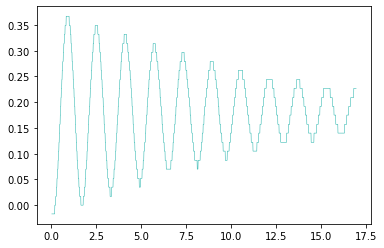

In [39]:
plt.plot(t_origin, phi_origin, linewidth=0.5, color='lightseagreen')

## direct fitting

Text(0.5, -0.25, 'fig. 1.2.1 Damped vibration of the Bohr pendulum. Damp=7V Drive=0V')

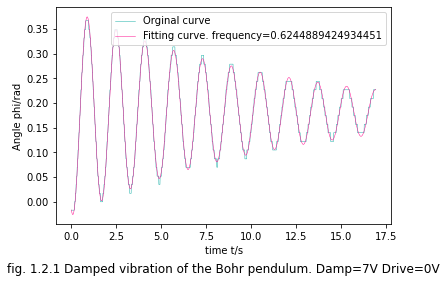

In [40]:
def phi_t(t, A1, bt, omg, A4, A5):
    return A1 * np.exp(-bt*t) * np.cos(omg*t + A4) + A5

popt, pcov = curve_fit(phi_t, t_origin, phi_origin)

t_dense = np.linspace(t_origin.min(), t_origin.max(), 10000)

phivals = phi_t(t_dense, popt[0], popt[1], popt[2], popt[3], popt[4])
omega = popt[2]
beta = popt[1]
frequncy = omega/(2*np.pi)

plt.plot(t_origin, phi_origin, linewidth=0.5, color='lightseagreen', label='Orginal curve')
plt.plot(t_dense, phivals, linewidth=0.5, color='deeppink', label='Fitting curve. frequency={}'.format(frequncy))

plt.legend(loc='upper right')
plt.xlabel('time t/s')
plt.ylabel('Angle phi/rad')
plt.title('fig. 1.2.1 Damped vibration of the Bohr pendulum. Damp=7V Drive=0V', y=-0.25)

In [41]:
pharm_table = pd.DataFrame(columns=['index', 'omega', 'T', 'frequency', 'beta'])
pharm_table.set_index('index', drop=True, inplace=True)
pharm_table.loc['free'] = [omega, 2*np.pi/omega, omega/(2*np.pi), beta]
print(pharm_table)

         omega         T  frequency      beta
index                                        
free   3.92378  1.601309   0.624489  0.090238


## fft

No handles with labels found to put in legend.
Main frequency: 0.0


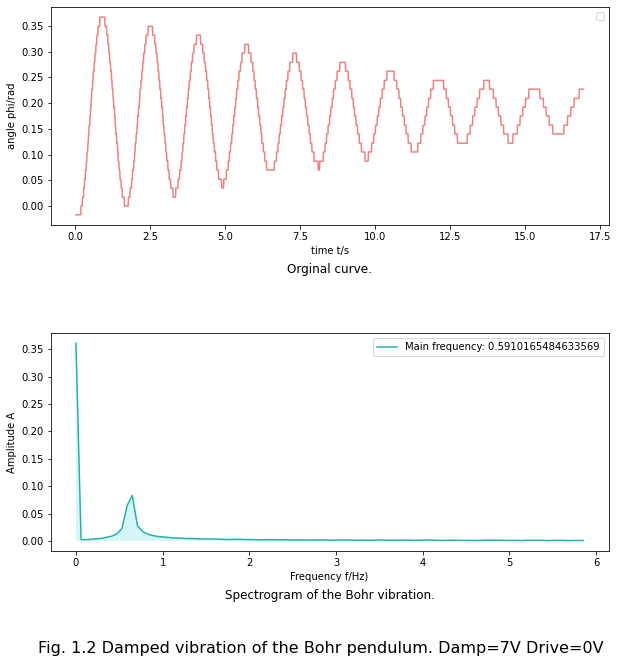

In [42]:
# Sampling rate
fs = 100

# signal
t = t_origin
N = len(t)
y = phi_origin

# fft
yf = fft(y)
xf = fftfreq(N, 1/fs)[:N//2]
yf_nor = 2.0/N * np.abs(yf[0:N//2]) # normalization

# plotting
fig, ax =  plt.subplots(2,1,figsize=(10, 10))

ax[0].plot(t, y, color='lightcoral')
ax[0].set_xlabel('time t/s')
ax[0].set_ylabel('angle phi/rad')
ax[0].set_title('Orginal curve.', y=-0.25)

ax[1].plot(xf[0:100], yf_nor[0:100], color='lightseagreen', label='Main frequency: {}'.format(xf[np.argmax(yf_nor[1:])]))
ax[1].fill_between(xf[0:100], 0, yf_nor[0:100], facecolor='paleturquoise', interpolate=True, alpha = 0.5)
ax[1].set_xlabel('Frequency f/Hz)')
ax[1].set_ylabel('Amplitude A')
ax[1].set_title('Spectrogram of the Bohr vibration.', y=-0.25)
ax[1].legend()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
plt.suptitle('Fig. 1.{} Damped vibration of the Bohr pendulum. Damp={}V Drive={}V'.format(2, 7, 0), y=0, fontsize=16)

print('Main frequency: {}'.format(xf[np.argmax(yf_nor)]))